<a href="https://colab.research.google.com/github/Karthikeya201202/Unsupervised-Image-Classification/blob/main/Image_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.getcwd()
os.chdir(r"/content/drive/MyDrive/face_images")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/face_images'

In [ ]:
os.chdir(r"/content/drive/MyDrive/face_images")
os.getcwd()

'/content/drive/MyDrive/face_images'

In [ ]:
import shutil
import os


# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder):

	# Path
	path = os.path.join(parent_folder, folder_name)

	# Create the folder
	# 'new_folder' in
	# parent_folder
	try:
		# mode of the folder
		mode = 0o777

		# Create folder
		os.mkdir(path, mode)
	except OSError as error:
		print(error)

# current folder path
current_folder = os.getcwd()

# list of folders to be merged
list_dir = ['Folder 1', 'Folder 2', 'Folder 3']

# enumerate on list_dir to get the
# content of all the folders ans store
# it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
	path = os.path.join(current_folder, val)
	content_list[ list_dir[index] ] = os.listdir(path)

# folder in which all the content will
# be merged
merge_folder = "merge_folder"

# merge_folder path - current_folder
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder)

# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)

# loop through the list of folders
for sub_dir in content_list:

	# loop through the contents of the
	# list of folders
	for contents in content_list[sub_dir]:

		# make the path of the content to move
		path_to_content = sub_dir + "/" + contents

		# make the path with the current folder
		dir_to_move = os.path.join(current_folder, path_to_content )

		# move the file
		shutil.move(dir_to_move, merge_folder_path)


[Errno 17] File exists: '/content/drive/MyDrive/face_images/merge_folder'


In [ ]:
os.chdir("/content/drive/MyDrive/face_images/merge_folder")
dir=os.getcwd()
dir

'/content/drive/MyDrive/face_images/merge_folder'

In [ ]:
len(os.listdir(dir))

36059

In [ ]:
# checking google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from random import randint
%matplotlib inline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model


In [ ]:
os.getcwd()

'/content/drive/MyDrive/face_images/merge_folder'

In [ ]:
faces=[]
with os.scandir(dir) as files: #scandir() used to get the iterator os a directory
  for file in files:
    if file.name.endswith('.jpg'):
      faces.append(file.name)

In [ ]:
print(faces[:5])

['45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00003425_0.jpg', '45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00003425_1.jpg', '45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00003425_3.jpg', '45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00002151_5.jpg', '45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00002843_5.jpg']


In [ ]:
# load the image as 224x224 array as VGG16 model takes 224x224
img= load_img(faces[0],target_size=(224,224))

img=np.array(img)
print(img.shape)

(224, 224, 3)


In [ ]:
#reshape the image

reshaped_img= img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [ ]:
image= preprocess_input(reshaped_img)

In [ ]:
model= VGG16()

model=Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 16s 0us/step


In [ ]:
features=model.predict(image)
print(features.shape) # note that this for face[0]

1/1 [==============================] - 8s 8s/step
(1, 4096)


## Feature Extraction using VGG16 model

In [ ]:
# now lets define a function to extract_features of images

def extract_features(file,model):
  img= load_img(file,target_size=(224,224))
  img=np.array(img)
  reshaped_img=img.reshape(1,224,224,3)

  image= preprocess_input(reshaped_img)

  features=model.predict(image,use_multiprocessing=True)
  return features

In [ ]:

# Define the path to your pickle file
p = "/content/drive/MyDrive/face_images/face_features.pkl"

# Check if the pickle file already exists
if os.path.exists(p):
    # If it exists, load the existing data
    with open(p, 'rb') as file:
        data = pickle.load(file)
else:
    # If it doesn't exist, initialize an empty dictionary
    data = {}

# Iterate through your faces and extract features
for face in faces:
    try:
        x = extract_features(face, model)
        data[face] = x
    except Exception as e:
        # Handle any exceptions that may occur during feature extraction
        print(f"Error processing {face}: {str(e)}")

    # Save the data to the pickle file after each iteration
    with open(p, 'wb') as file:
        pickle.dump(data, file)

# Convert the dictionary keys (file names) and values (features) to arrays
filenames = np.array(list(data.keys()))
features = np.array(list(data.values()))

print(features.shape)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step


In [ ]:
import pickle

# Load the feature data from the .pkl file
with open('/content/drive/MyDrive/face_images/face_features.pkl', 'rb') as file:
    feature_data = pickle.load(file)


In [ ]:
filenames = np.array(list(feature_data.keys()))
features = np.array(list(feature_data.values()))
print(features.shape)

(10081, 1, 4096)


This code first checks if the pickle file exists. If it exists, it loads the existing data into the data dictionary. If it doesn't exist, it initializes an empty dictionary. Then, after processing each image, it saves the updated data dictionary to the pickle file. This way, if the cell execution stops, you can resume from where you left off by loading the data from the pickle file.

In [ ]:
features= features.reshape(-1,4096)
features.shape

(10081, 4096)

# Principal Component Analysis


In [ ]:
pca=PCA(n_components=0.90,random_state=22)
pca.fit(features)
new=pca.transform(features)

In [ ]:
pca.n_components_

91

## Elbow Method for Optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

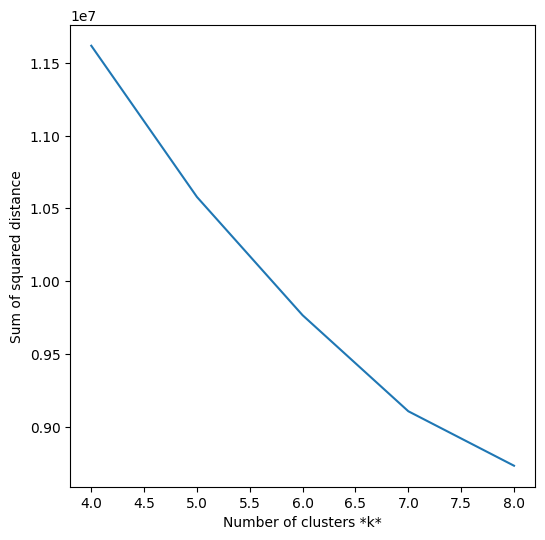

In [ ]:
sse = []
list_k = list(range(4,9))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(new)

    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
#clusstering the images
kmeans= KMeans(n_clusters=7,random_state=22)
kmeans.fit(new)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=22)

In [ ]:
groups={}
for file,cluster in zip(filenames,kmeans.labels_):
  if cluster not in groups.keys():
    groups[cluster]=[]
    groups[cluster].append(file)

  else:
    groups[cluster].append(file)


In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    # only allow up to 50 images to be shown at a time
    if len(files) > 50:
        print(f"Clipping cluster size from {len(files)} to 50")
        files = files[:49]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 1603 to 50


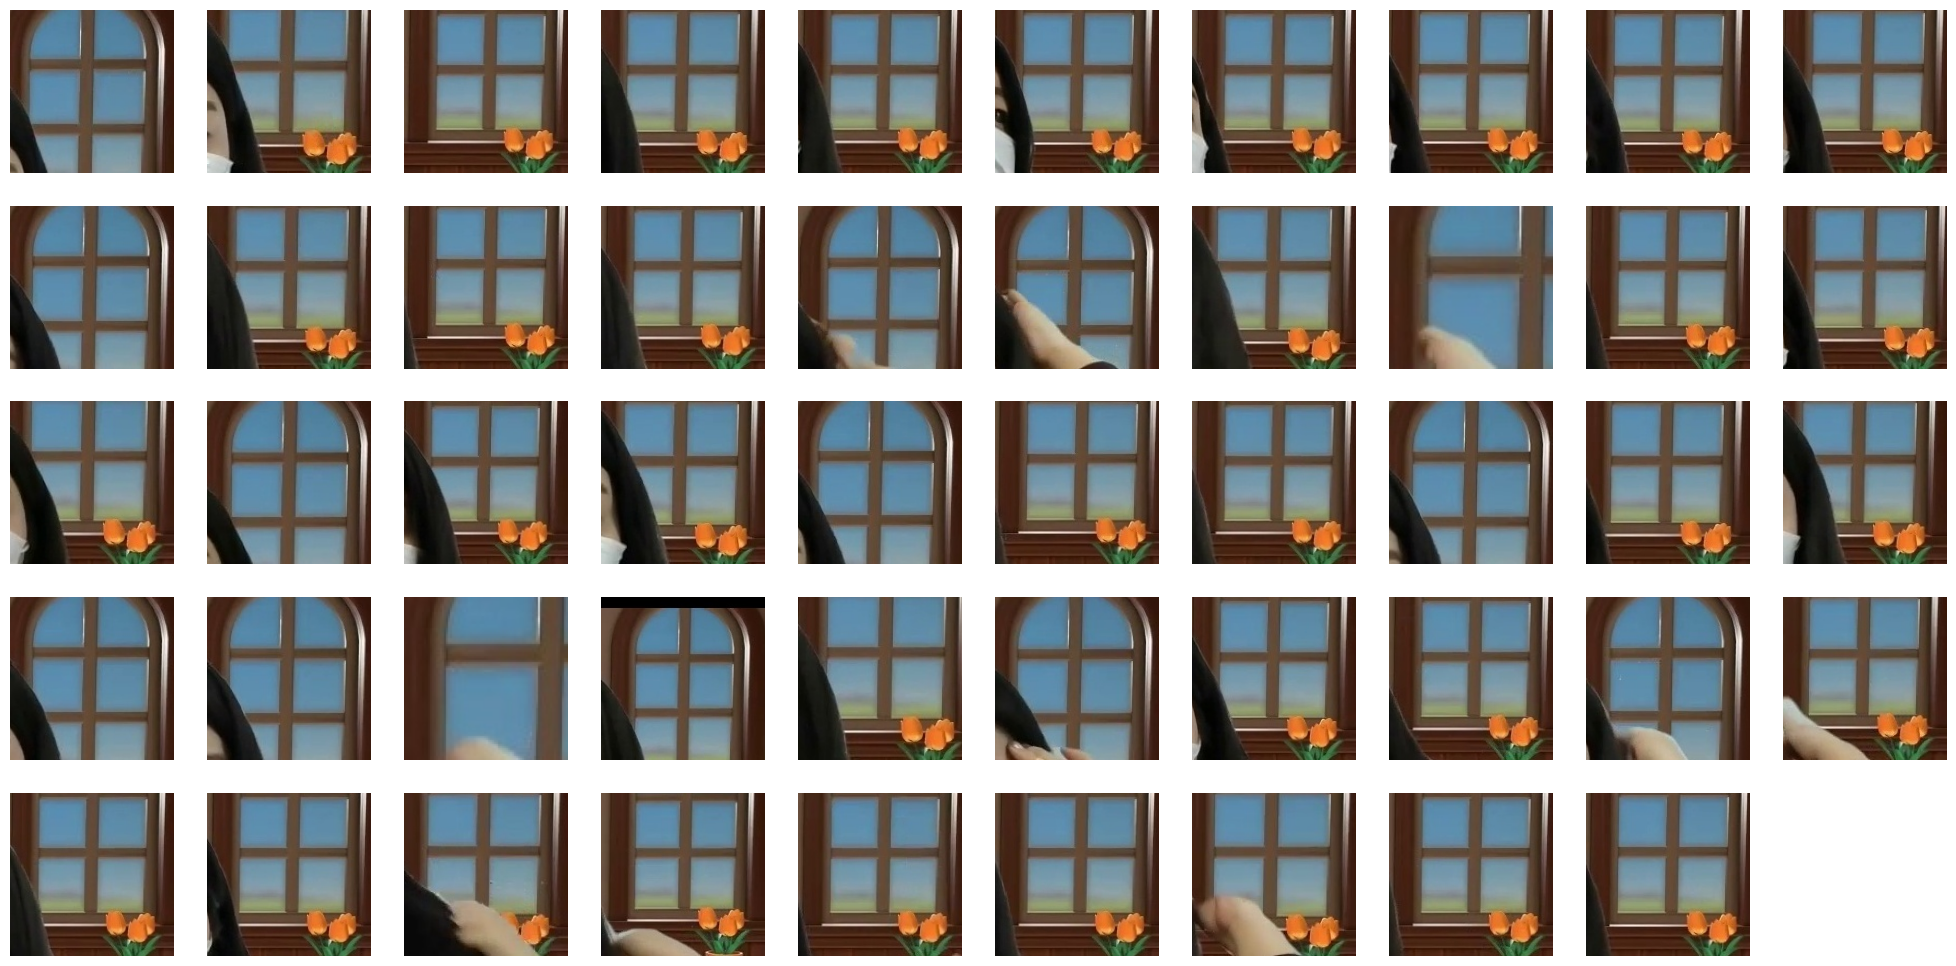

In [ ]:
view_cluster(4)

Clipping cluster size from 1430 to 50


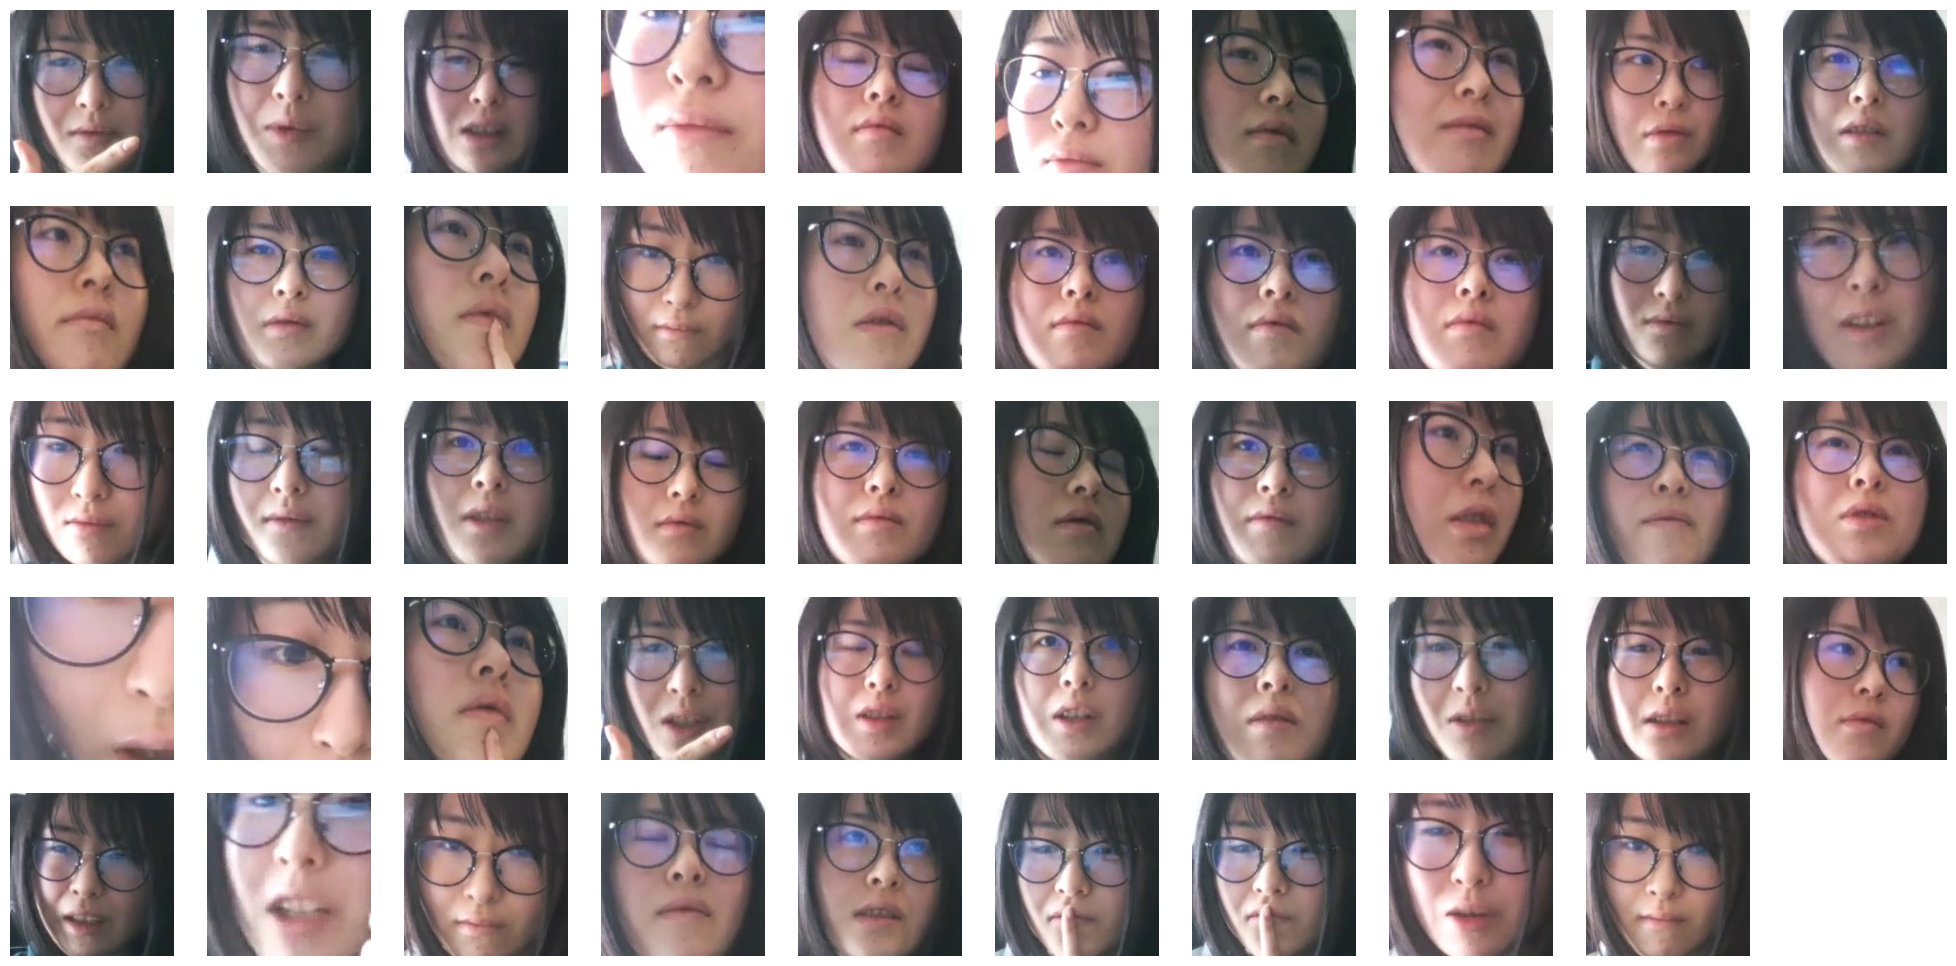

In [ ]:
view_cluster(3)

Clipping cluster size from 2013 to 50


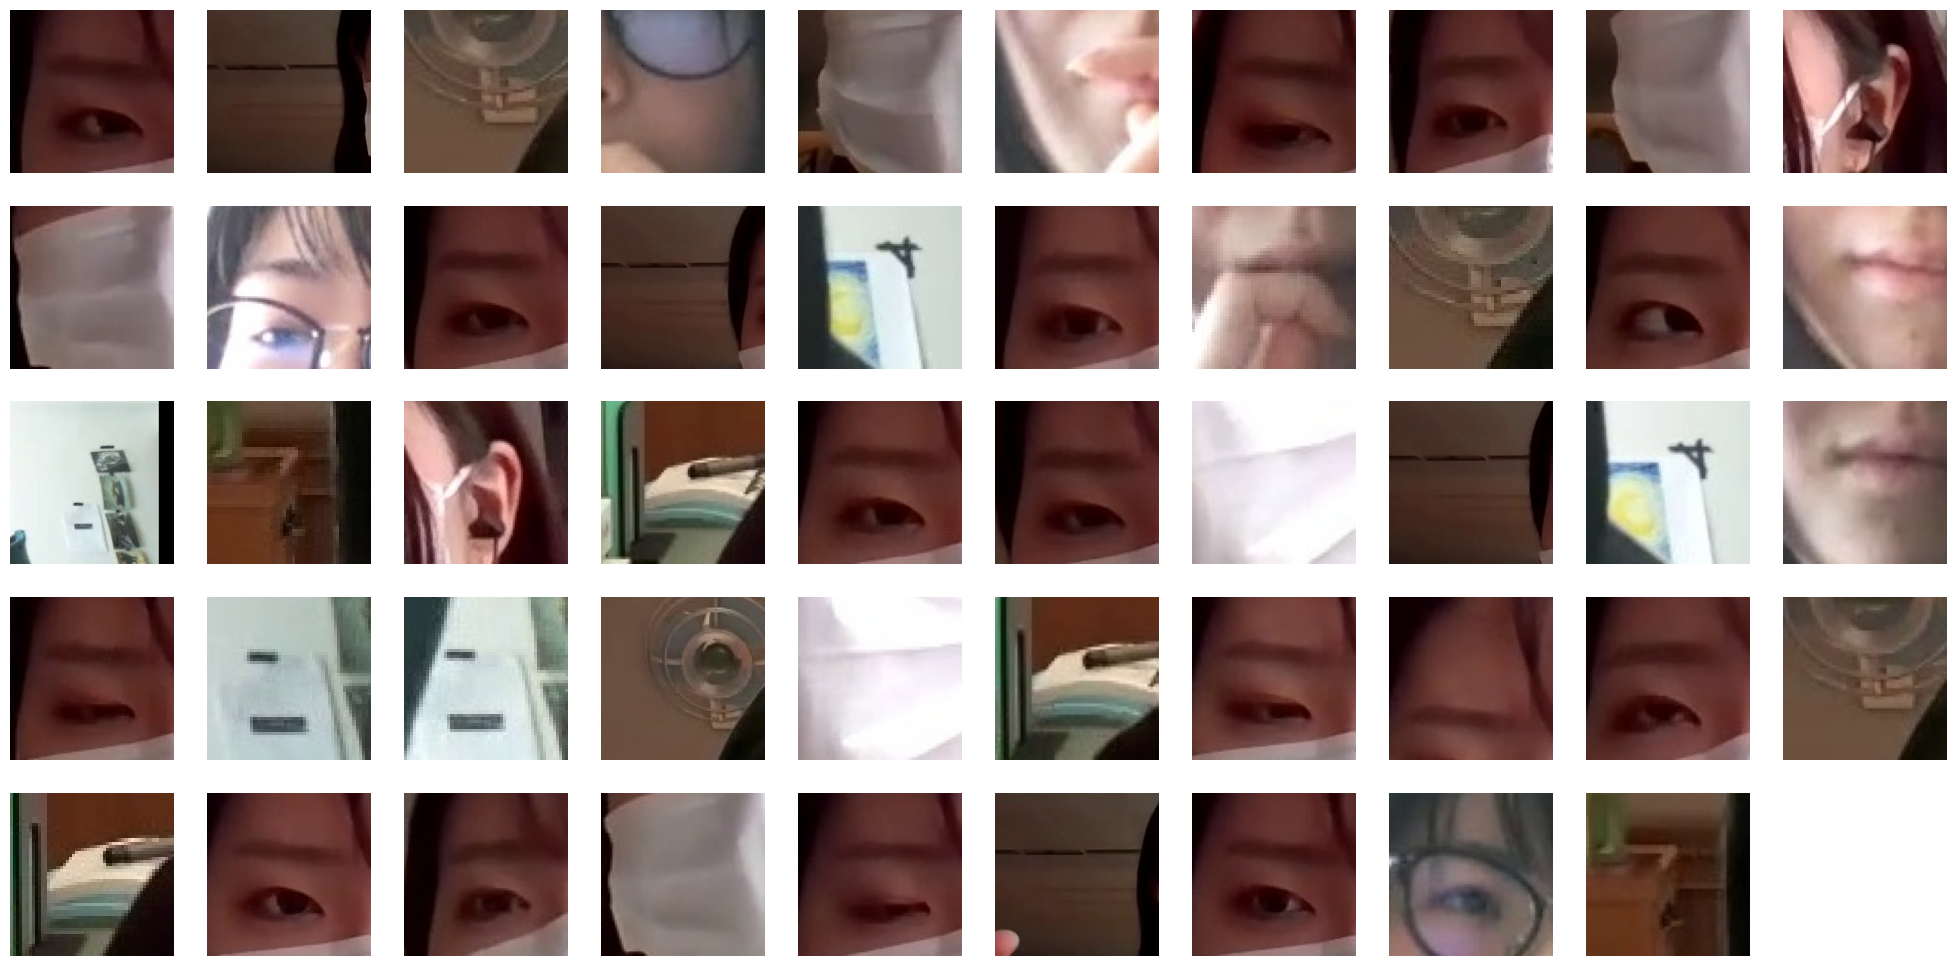

In [ ]:
view_cluster(2)

In [ ]:
#predict the labels of clusters.
label = kmeans.predict(new)

In [ ]:
label

array([4, 4, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
 #filter rows of original data
filtered_label0 = new[label == 0]

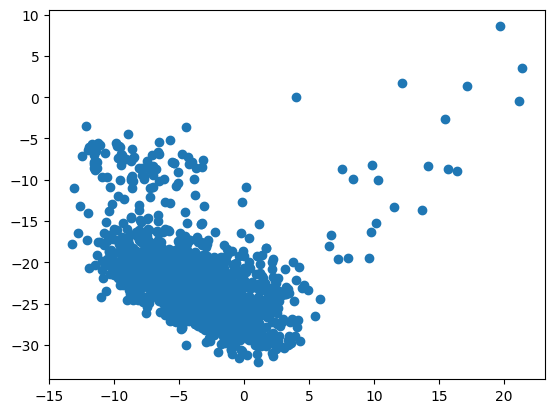

In [ ]:
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

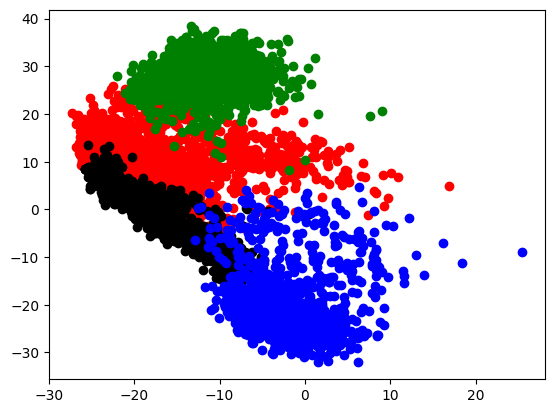

In [ ]:
#filter rows of original data
filtered_label2 = new[label == 2]
filtered_label3 = new[label == 3]
filtered_label4 = new[label == 4]
filtered_label5 = new[label == 5]
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'black')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'blue')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'green')
plt.show()

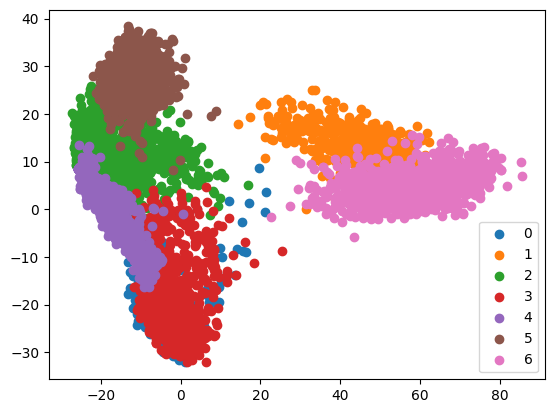

In [ ]:
#Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(new[label == i , 0] , new[label == i , 1] , label = i)
plt.legend()
plt.show()

# DBSCAN

In [ ]:
model = DBSCAN(eps=7, min_samples=2)


In [ ]:
model.fit(new)

DBSCAN(eps=7, min_samples=2)